In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [154]:
df=pd.read_csv("D:TensorFlow_FILES/DATA/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### data cleaning

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [156]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [157]:
df['date'].dtype

dtype('O')

In [158]:
df['date']=pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

### exploratory data analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

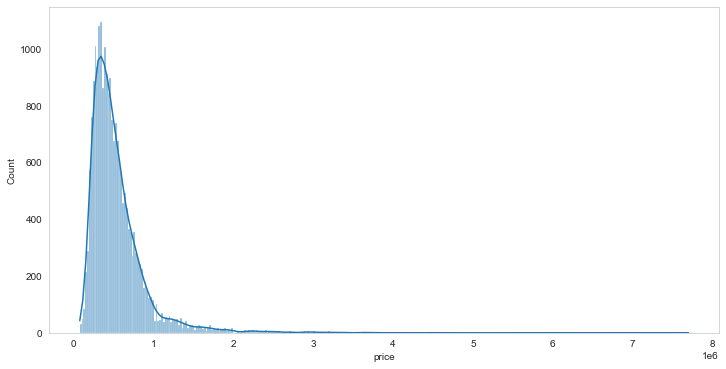

In [159]:
sns.set_style("whitegrid",{"axes.grid":False})
plt.figure(figsize=(12,6))
sns.histplot(df['price'],kde=True)

In [160]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

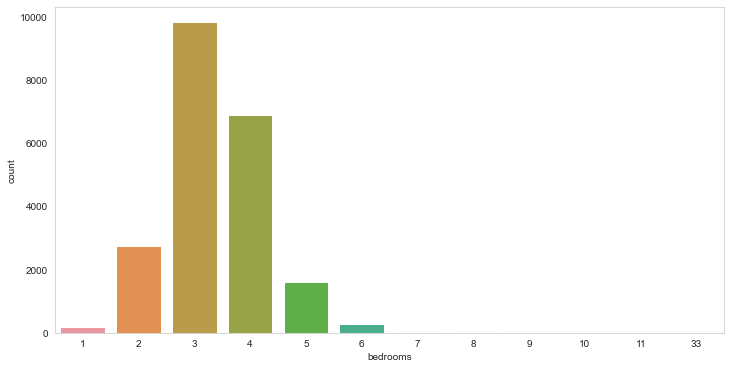

In [161]:
plt.figure(figsize=(12,6))
sns.countplot(x='bedrooms',data=df)

In [162]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

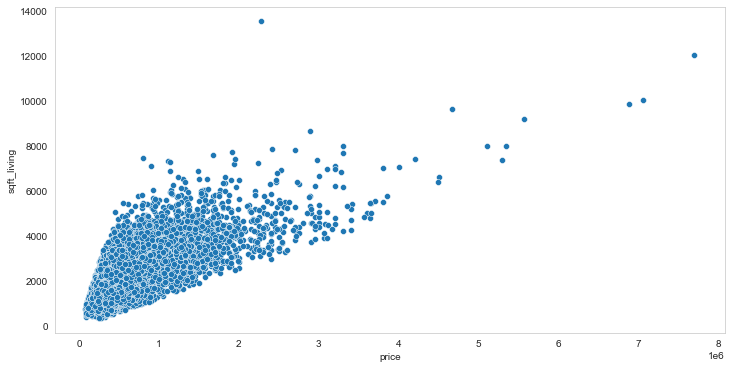

In [163]:
# scatter plot of highly correlated features
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='sqft_living', data=df)

<Figure size 864x432 with 0 Axes>

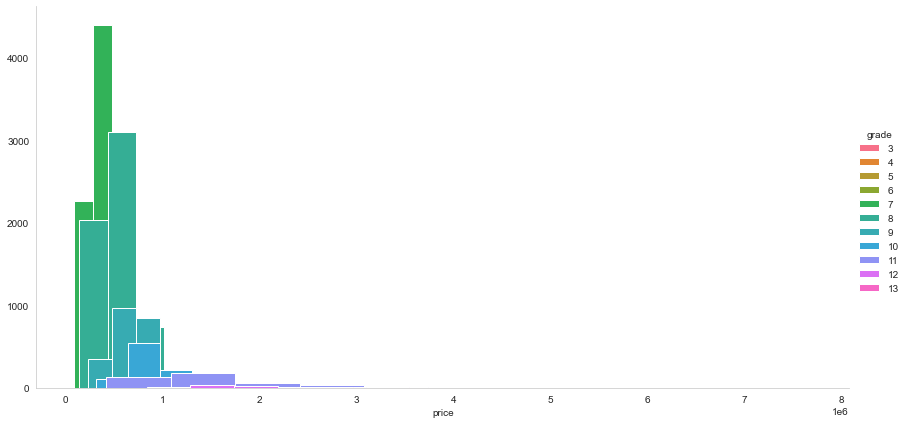

In [164]:
plt.figure(figsize=(12,6))
g=sns.FacetGrid(data=df, hue='grade', height=6, aspect=2)
g.map(plt.hist,'price')
g.add_legend()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

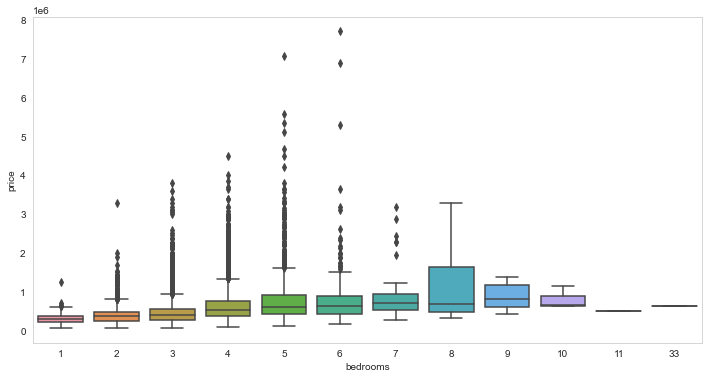

In [165]:
plt.figure(figsize=(12,6))
sns.boxplot(y='price',x='bedrooms', data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

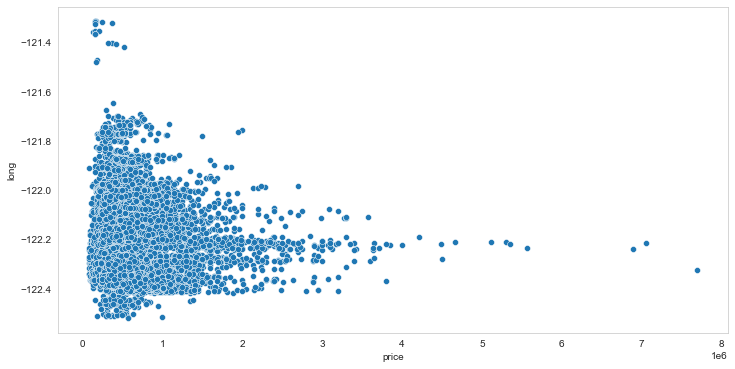

In [166]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='long',x='price', data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

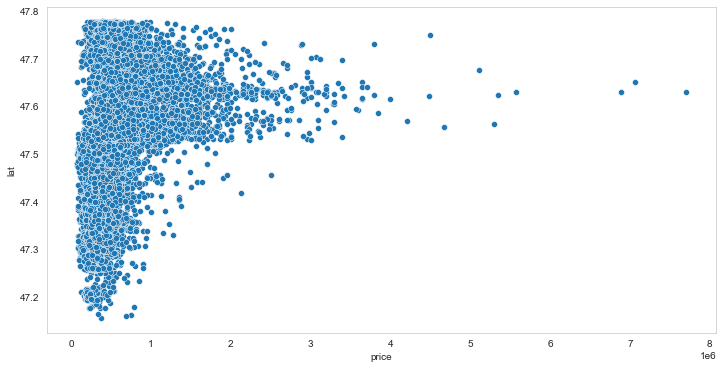

In [167]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='lat',x='price', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

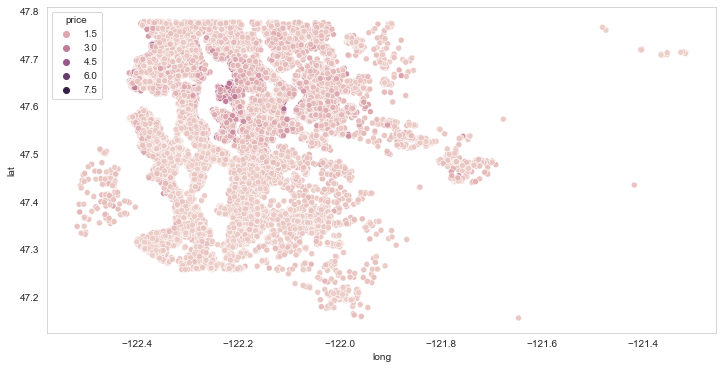

In [168]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat', data=df, hue='price',color='blue')

In [169]:
df.sort_values('price' ,ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,2014-06-18,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [170]:
len(df)*0.01

215.97

In [171]:
non_top1_df= df.sort_values('price', ascending=False).iloc[216:]
non_top1_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


<AxesSubplot:xlabel='long', ylabel='lat'>

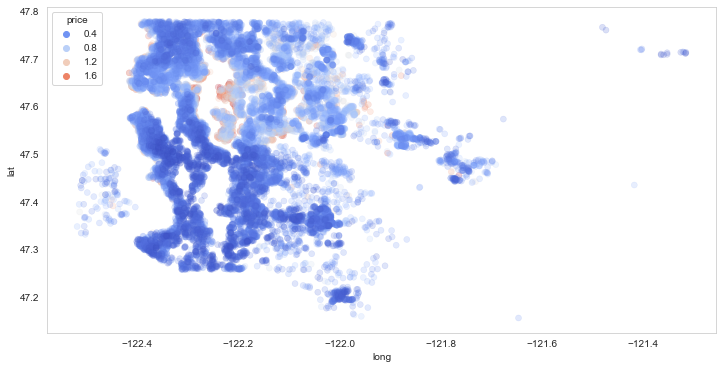

In [172]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat', data=non_top1_df, alpha=0.2, hue='price',palette='coolwarm', edgecolor=None)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

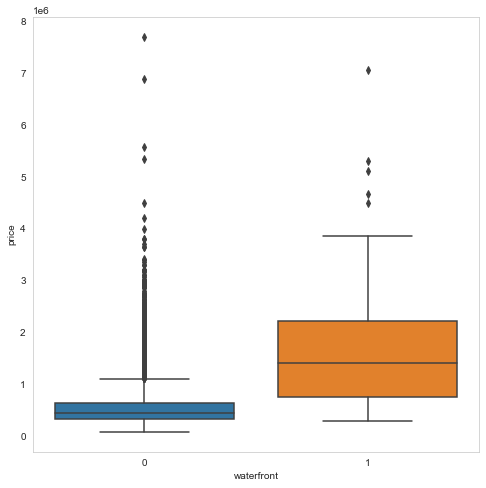

In [173]:
plt.figure(figsize=(8,8))
sns.boxplot(x='waterfront',y='price', data=df)

In [174]:
#drop the id column

df=df.drop('id', axis=1)

In [175]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [176]:
df['year']=df['date'].apply(lambda x : x.year)
df['month']=df['date'].apply(lambda x : x.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='year', ylabel='count'>

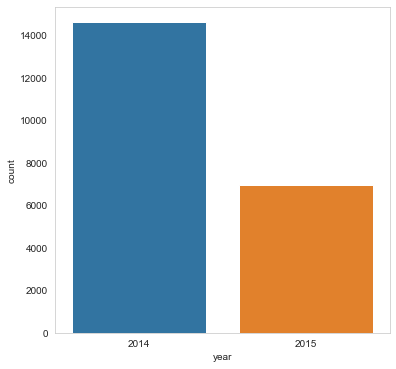

In [177]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='year')

<AxesSubplot:xlabel='month', ylabel='count'>

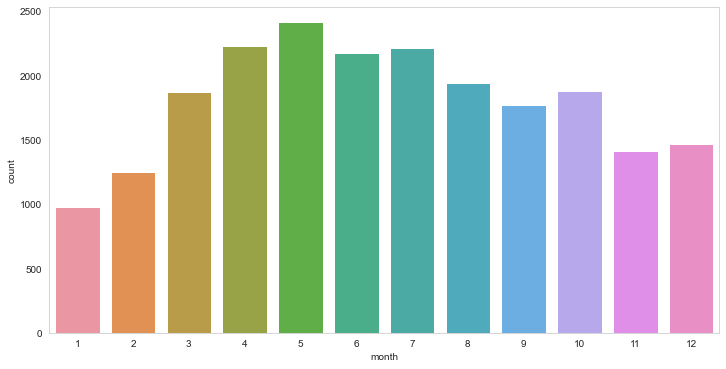

In [178]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='month')

<AxesSubplot:xlabel='month'>

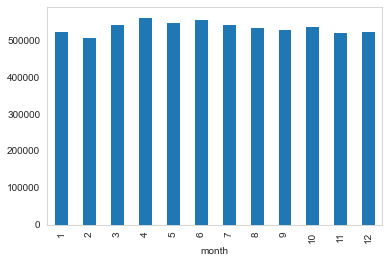

In [179]:
df.groupby("month").mean()['price'].plot(kind='bar')

<AxesSubplot:xlabel='year'>

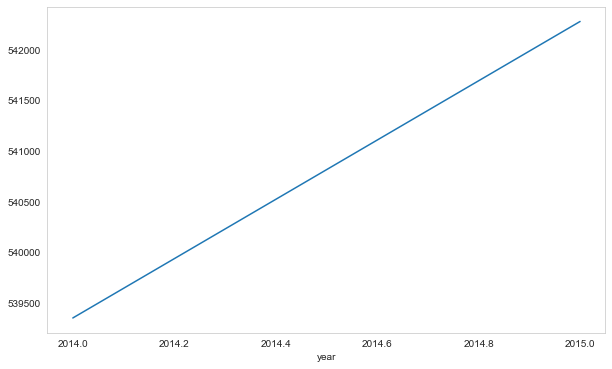

In [180]:
df.groupby("year").mean()['price'].plot(figsize=(10,6))

In [181]:
#drop the date and zipcode columns

df=df.drop(['zipcode','date'], axis=1)

In [182]:
pd.DataFrame([df['yr_renovated'].value_counts()])

,0,2014,2013,2003,2005,2007,2000,2004,1990,2006,...,1940,1946,1971,1967,1934,1951,1959,1948,1954,1944
yr_renovated,20683,91,37,36,35,35,35,26,25,24,...,2,2,2,2,1,1,1,1,1,1


In [145]:
# convert all renovated house year values to 1

#df.loc[df['yr_renovated']!=0,'yr_renovated']=1

In [153]:
df['yr_renovated'].value_counts()

0    20683
1      914
Name: yr_renovated, dtype: int64

### Model fitting

In [183]:
x=df.drop('price', axis=1)
y= df['price']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [186]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

print("x_train shape is :", x_train.shape)

x_train shape is : (17277, 19)


array([[0.0625    , 0.36666667, 0.25937737, ..., 0.03757399, 0.        ,
        0.54545455],
       [0.0625    , 0.06666667, 0.03720577, ..., 0.01217508, 0.        ,
        0.90909091],
       [0.0625    , 0.23333333, 0.08352316, ..., 0.00878641, 0.        ,
        0.63636364],
       ...,
       [0.0625    , 0.16666667, 0.08276386, ..., 0.02095459, 1.        ,
        0.09090909],
       [0.0625    , 0.06666667, 0.05694761, ..., 0.00752858, 1.        ,
        0.09090909],
       [0.09375   , 0.16666667, 0.14958238, ..., 0.0118879 , 0.        ,
        0.90909091]])

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

In [188]:
model.compile(optimizer='adam', loss='mse')

In [189]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
135/135 [==============================] - 2s 7ms/step - loss: 432973152256.0000 - val_loss: 402117984256.0000
Epoch 2/400
135/135 [==============================] - 1s 4ms/step - loss: 429558759424.0000 - val_loss: 390480560128.0000
Epoch 3/400
135/135 [==============================] - 1s 4ms/step - loss: 384279773184.0000 - val_loss: 294429130752.0000
Epoch 4/400
135/135 [==============================] - 1s 5ms/step - loss: 222638047232.0000 - val_loss: 111254003712.0000
Epoch 5/400
135/135 [==============================] - 1s 5ms/step - loss: 108432506880.0000 - val_loss: 84783874048.0000
Epoch 6/400
135/135 [==============================] - 0s 4ms/step - loss: 100467867648.0000 - val_loss: 82492973056.0000
Epoch 7/400
135/135 [==============================] - 1s 5ms/step - loss: 97748230144.0000 - val_loss: 79973818368.0000
Epoch 8/400
135/135 [==============================] - 1s 4ms/step - loss: 94827077632.0000 - val_loss: 77252763648.0000
Epoch 9/400
135/135 [=

<AxesSubplot:>

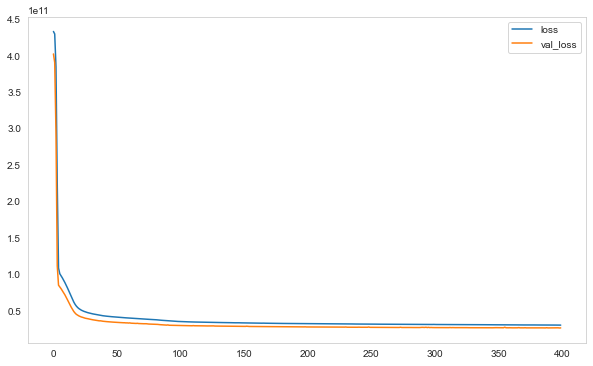

In [193]:
losses=pd.DataFrame(model.history.history)

losses.plot(figsize=(10,6))

In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

predictions=model.predict(x_test)

print("mean of price is :", df['price'].mean())
print("\n")

print("mean square error is :", mean_squared_error(predictions, y_test))
print("mean absolute error is :", mean_absolute_error(predictions, y_test))
print("root mean square error is :",np.sqrt( mean_squared_error(predictions, y_test)))
print("variance explained score is :", explained_variance_score(predictions, y_test))


mean of price is : 540296.5735055795


mean square error is : 26151570610.5063
mean absolute error is : 101721.58637062355
root mean square error is : 161714.47248315872
variance explained score is : 0.7239982691017333


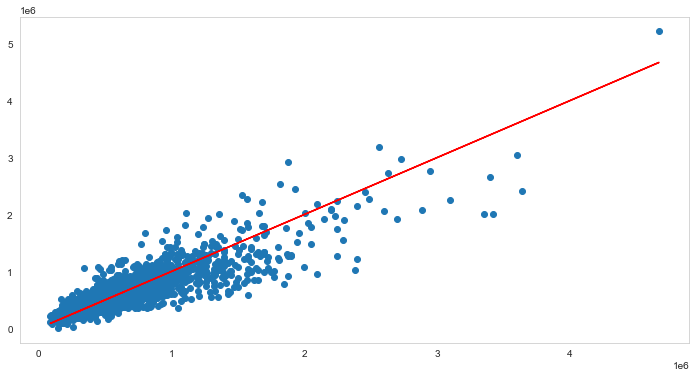

In [204]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, "r")

In [230]:
single_house= [df.drop('price', axis=1).iloc[0]]
single_house

[bedrooms            3.0000
 bathrooms           1.0000
 sqft_living      1180.0000
 sqft_lot         5650.0000
 floors              1.0000
 waterfront          0.0000
 view                0.0000
 condition           3.0000
 grade               7.0000
 sqft_above       1180.0000
 sqft_basement       0.0000
 yr_built         1955.0000
 yr_renovated        0.0000
 lat                47.5112
 long             -122.2570
 sqft_living15    1340.0000
 sqft_lot15       5650.0000
 year             2014.0000
 month              10.0000
 Name: 0, dtype: float64]

In [238]:
x_train_new= df.drop('price',axis=1)
x_train_new= scaler.fit_transform(x_train_new)
values=scaler.transform(single_house)
values

array([[0.0625    , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.81818182]])

In [239]:
model.predict(values)

array([[315268.84]], dtype=float32)

In [240]:
df['price'].iloc[0]

221900.0